# Distribuciones continuas

## Distribución normal teórica
$$
P(X) = \frac{1}{\sigma \sqrt{2 \pi}} \exp{\left[-\frac{1}{2}\left(\frac{X-\mu}{\sigma} \right)^2 \right]}
$$
**Donde**:
- `µ`: Media de la distribución.
- `σ`: Desviación estandar de la distribución.
- `X`: Variable aleatoria.

📢 La distribución normal (campana de gauss) es una de las distribuciones más importantes de la probabilidad, con ella se representan distribuciones de valores/variables continuas que suelen ser más complejas que las discretas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

Función manual de la distribución normal dada la formula de arriba:

In [9]:
def gaussian(x, mu, sigma):
  return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * pow((x-mu)/sigma, 2))

In [15]:
start_arange = -4
end_arange = 4
step_arange = 0.1

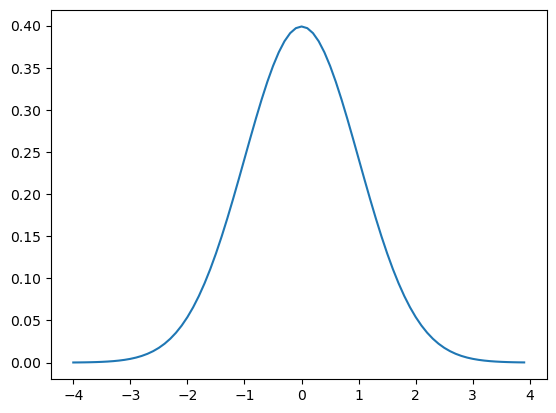

In [29]:
x = np.arange(start_arange, end_arange, step_arange)
y = gaussian(x, mu=0.0, sigma=1.0)
plt.plot(x, y)
plt.show()

Dependiendo de los valores de la media o de la desviación estandar la campana puede hacerce más angosta o más ancha:

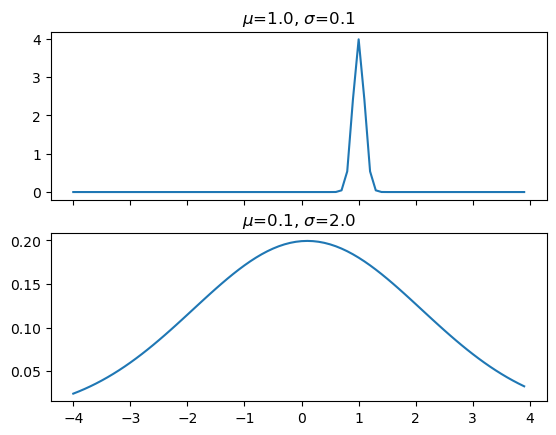

In [43]:
fig, axs = plt.subplots(ncols=1, nrows=2, sharex=True)

axs[0].plot(x, gaussian(x, mu=1.0, sigma=0.1))
axs[0].set_title("$\mu$=1.0, $\sigma$=0.1")

axs[1].plot(x, gaussian(x, mu=0.1, sigma=2.0))
axs[1].set_title("$\mu$=0.1, $\sigma$=2.0")

plt.show()

La libreria `scipy` nos hace la vida un poco más sencilla, pues cuenta con un gran número de funciones matemáticas como la que definimos manualmente al inicio (`gaussian()`).

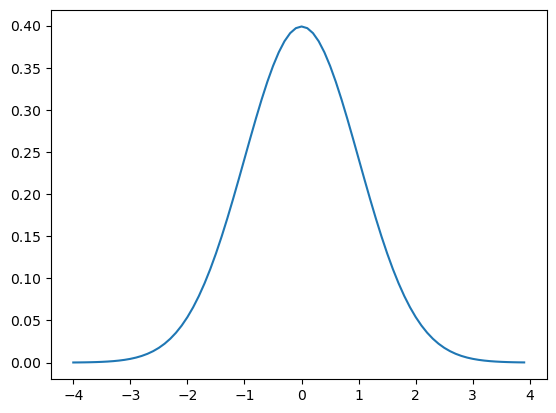

In [45]:
# Definimos una distribución normal con media de 0 y una desviacion estandar de 1
dist = norm(0, 1)
x = np.arange(start_arange, end_arange, step_arange)
# pdf -> Probability density funtion
y = [dist.pdf(value) for value in x]

plt.plot(x,y)
plt.show()

La distribución normal también cuenta con su respectiva función de _distribución acumulada de probabilidad_, sin embargo las distribuciones continuas como la gausiana, requiere de la integral de su función original (la que se enucentra al inicio del notebook). 

Sin embargo el calculo de dicha integral no es tan sencillo, por esa razón el siguiente ejercicio va directo al grano utilizando la función `cdf` de la libreria  `scipy`.

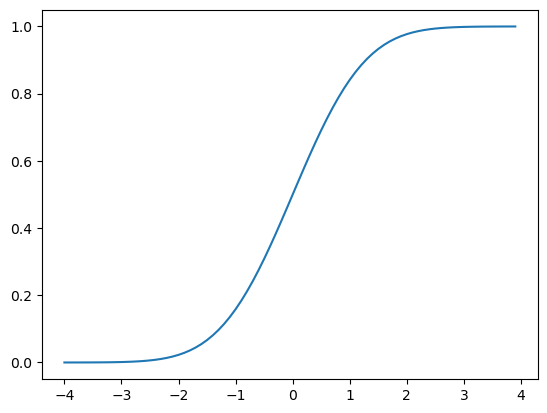

In [46]:
# Definimos una distribución normal con media de 0 y una desviacion estandar de 1
dist = norm(0, 1)
x = np.arange(start_arange, end_arange, step_arange)
# cdf -> Comulative density funtion
y = [dist.cdf(value) for value in x]

plt.plot(x,y)
plt.show()

## Distribución normal a partir de los datos

- Origen del datasource: https://seattlecentral.edu/qelp/sets/057/057.html

📢 Antes de leer el archivo .xls primero instalar la dependencia `xlrd`

In [65]:
df = pd.read_excel("../data/s057.xls")
df.head(2)

,Normally Distributed Housefly Wing Lengths,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,"Sokal, R.R., and P.E.Hunter. 1955.",NaN,NaN,NaN
1,NaN,NaN,NaN,NaN


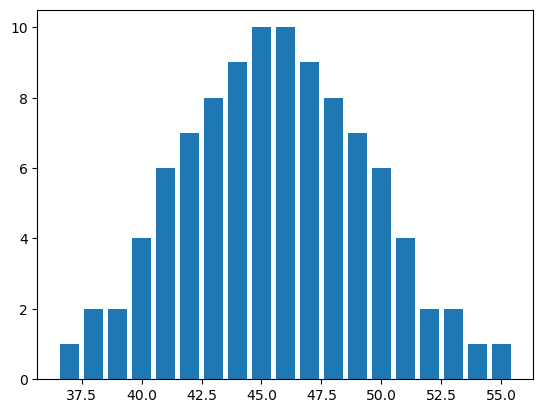

In [58]:
arr = df["Normally Distributed Housefly Wing Lengths"].values[4:]
values, dist = np.unique(arr, return_counts=True)

plt.bar(values, dist)
plt.show()

De los datos obtenidos del archivo excel, tenemos un diagrama de frecuencias que a simple vista pdemos asumir que tiene una _distribución normal_.

Estimación de una distribución:

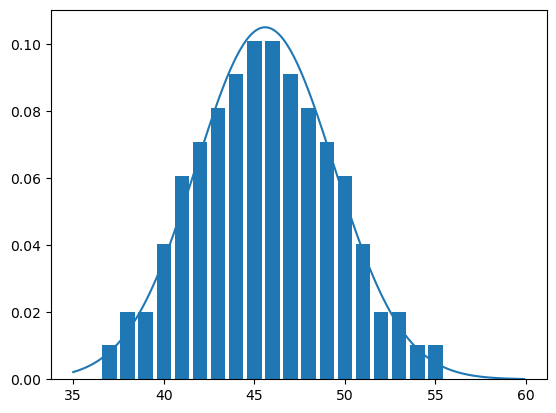

In [64]:
mu = arr.mean()
sigma = arr.std()

# Creamos un intervalo de datos partiendo del los valores máximos y mínimos del dataset.
x = np.arange(35, 60, 0.1)
dist = norm(mu, sigma)
y = [dist.pdf(value) for value in x]

plt.plot(x,y)

values, dist = np.unique(arr, return_counts=True)
plt.bar(values, dist/len(arr))
plt.show()

Con ambas visualizaciones sobrepuestas comprobames que los datos que obtuvimos del dataset tienen una distribución normal (o gaussiana).